# **VISUALIZING AND PREDICTING HEART DISEASES USING INTERACTIVE DASHBOARD**

Heart Disease Prediction using Machine Learning Model

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,train_test_split
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
dataframe=pd.read_csv("/content/Heart_Disease_Prediction.csv")
dataframe.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [64]:
x = dataframe.iloc[ : , :-1].values
y = dataframe.iloc[ : , -1].values

In [65]:
X_train, X_test,y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [66]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 243, Test set:27
Fold:2, Train set: 243, Test set:27
Fold:3, Train set: 243, Test set:27
Fold:4, Train set: 243, Test set:27
Fold:5, Train set: 243, Test set:27
Fold:6, Train set: 243, Test set:27
Fold:7, Train set: 243, Test set:27
Fold:8, Train set: 243, Test set:27
Fold:9, Train set: 243, Test set:27
Fold:10, Train set: 243, Test set:27


In [67]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [69]:
log_re=LogisticRegression()

In [70]:
log_re.fit(X_train,y_train)
log_re_pred=log_re.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [71]:
log_acc=accuracy_score(y_test,log_re_pred)
print("Logistic Accuracy Score: ","{:.2f}%".format(100*log_acc))

Logistic Accuracy Score:  79.41%


In [72]:
from mlxtend.plotting import plot_confusion_matrix

In [74]:
from sklearn.metrics import accuracy_score
input=(63,1,3,145,200,150,98,0,0,0,0,0,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
print(pre1)
a1 = accuracy_score(pre1,model1.predict(input_reshaped)) * 100
print(a1)

['Absence']
100.0


In [75]:
from sklearn.metrics import accuracy_score
input=(70,1,4,130,322,0,2,109,0,2.4,2,3,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
print(pre1)
a1 = accuracy_score(pre1,model1.predict(input_reshaped)) * 100
print(a1)

['Presence']
100.0


<Figure size 432x288 with 0 Axes>

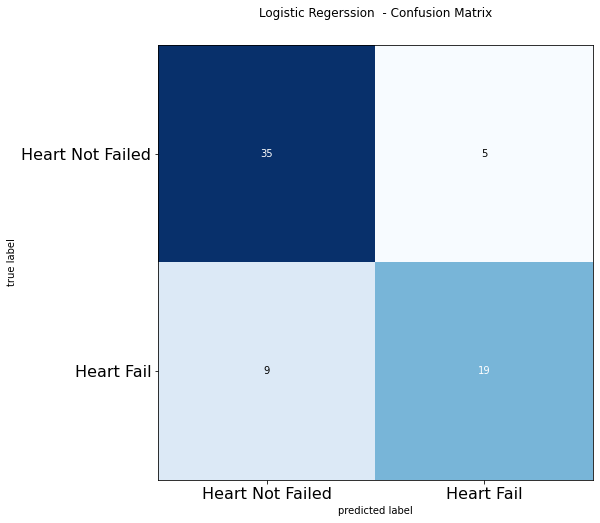

In [76]:
cm = confusion_matrix(y_test, log_re_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regerssion  - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()